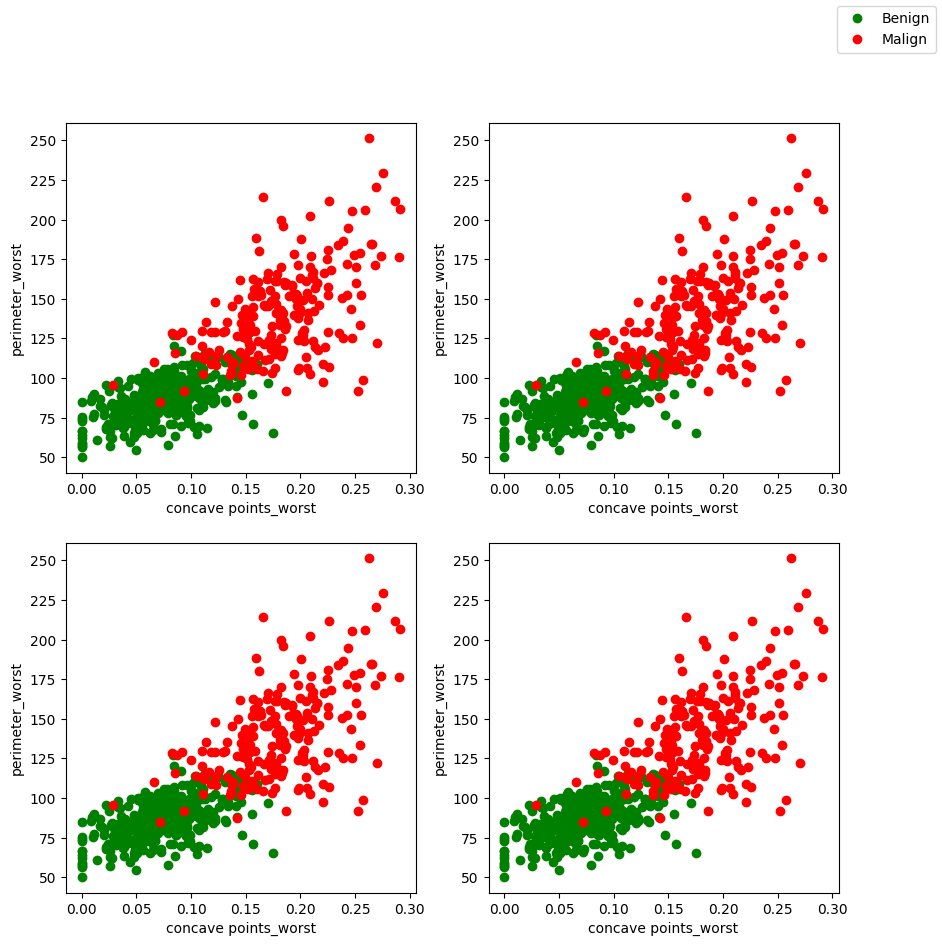

In [13]:
%run ./global.ipynb

# KNN Classification

[Reference](https://realpython.com/knn-python/#use-knn-to-predict-the-age-of-sea-slugs)

## K = 3

In [8]:
%%time

from sklearn.neighbors import KNeighborsClassifier
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1 ms


KNeighborsClassifier(n_neighbors=3)

## GridSeachCV

With neighbors as parameters

In [9]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": range(1, 50),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
_ = model.fit(X_train, y_train)
model.best_params_

CPU times: user 663 ms, sys: 3.2 ms, total: 666 ms
Wall time: 668 ms


{'n_neighbors': 9}

## GridSeachCV

With neighbors and weights as parameters

In [10]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
_ = model.fit(X_train, y_train)
model.best_params_

CPU times: user 993 ms, sys: 516 µs, total: 994 ms
Wall time: 996 ms


{'n_neighbors': 9, 'weights': 'uniform'}

## Bagging with GridSeachCV

With neighbors and weights as GridSearchCV parameters.

In [11]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gscv = GridSearchCV(KNeighborsClassifier(), parameters)
_ = gscv.fit(X_train, y_train)
best_params = gscv.best_params_
best_params

bagged_model = KNeighborsClassifier(**best_params)

from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(bagged_model, n_estimators=100)
model.fit(X_train, y_train)

CPU times: user 1.1 s, sys: 201 µs, total: 1.1 s
Wall time: 1.1 s


BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=9),
                  n_estimators=100)

In [12]:
%%time

# predict and measure
import numpy as np

train_preds = model.predict(X_train)
train_matches = train_preds == y_train
train_match_cnt = np.count_nonzero(train_matches == True)
train_cnt = len(train_matches)
train_accuracy = train_match_cnt / train_cnt

test_preds = model.predict(X_test)
test_matches = test_preds == y_test
test_match_cnt = np.count_nonzero(test_matches == True)
test_cnt = len(test_matches)
test_accuracy = test_match_cnt / test_cnt

f"Train accuracy: {train_match_cnt}/{train_cnt} ({round(train_accuracy, 4) * 100} %)"
f"Test accuracy: {test_match_cnt}/{test_cnt} ({round(test_accuracy, 4) * 100} %)"

CPU times: user 175 ms, sys: 898 µs, total: 176 ms
Wall time: 175 ms


'Test accuracy: 108/114 (94.74000000000001 %)'

## Comparison

GS = grid search
GridSearchCV with weights and neighbors found default weights (uniform) the best.
|ACCURACY (%)|k=3  |GS - k|GS - k, w|bagging|
|:---:       |:---:|:---: |:---:    |:---:  |
|**train**   |94.29|93.85 |93.85    |94.07  |
|**test**    |93.98|93.86 |93.86    |94.74  |

|CPU TIMES (ms)|k=3  |GS - k|GS - k, w|bagging|
|:---:         |:---:|:---: |:---:    |:---:  |
|**train**     |1.43 |677   |1010     |1080   |
|**test**      |17.3 |16.1  |12.6     |191    |

|WALL TIMES (ms)|k=3  |GS - k|GS - k, w|bagging|
|:---:          |:---:|:---: |:---:    |:---:  |
|**train**      |1.32 |688   |1010     |1010   |
|**test**       |16   |14.8  |11.2     |190    |